# Student Performance indicator

### Life cycle of MLProject

1. Understanding the ML project
2. Data Collection
3. Data checks to perform
4. EDA
5. Data Pre-processing
6. MOdel Training
7. Choose best model


## 1).PROBLEM STATEMENT

- This project understands how the student's performance is affected by other variables(Gender,Praental level of education,Lunch and Test Preparation Course

## 2).DATA COLLECTION

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1)Import Data & required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importcsv data as pd df
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

### 2.2 Dataset Info

- gender('female', 'male')

- race_ethnicity('group B', 'group C', 'group A', 'group D', 'group E')

- parental_level_of_education("bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school')
       
- lunch ('standard', 'free/reduced)

- test_preparation_course('none', 'completed')

## 3).Data checks to perform
- Check missing values
- CHeck Duplicates
- Check Datatype
- Check the no of unique values
- Check statisticsof data
- Check various categories present in categorical columns

In [6]:
# Check missnig value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###### There are no missing values in the dataset

In [7]:
#Check Duplicates
df.duplicated().sum()

0

##### No Duplicates 

In [8]:
#Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#Check the no of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#Check statisticsof data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above description of numerical data,all means are very close to each other- between 66 and 68.05
- All standard deviations are also close between 14.6 and 15.19
- While there is minscore=0 for math : minscore:10 for writing_score :  minscore:17reading_score


In [11]:
#Check the no of unique values
print("Categories in Gender variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch  variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in Gender variable:   ['female' 'male']
Categories in race_ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch  variable:   ['standard' 'free/reduced']
Categories in test_preparation_course variable:   ['none' 'completed']


In [12]:
#Define numerical & Categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print Columns
print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))

print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
#ADDING COLUMNS FOR TOTAL_SCORE AND AVERAGE
df['total_score']=df["math_score"]+ df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full=df[df['math_score'] == 100]['average'].count()
reading_score_full=df[df['reading_score']==100]['average'].count()
writing_score_full=df[df['writing_score']==100]['average'].count()

print(f'Number of students scoring full in Maths:{math_full}')
print(f'\nNumber of students scoring full in Reading:{reading_score_full}')
print(f'\nNumber of students scoring full in Writing:{writing_score_full}')


Number of students scoring full in Maths:7

Number of students scoring full in Reading:17

Number of students scoring full in Writing:14


In [16]:
math_less_20=df[df['math_score']<=20]['average'].count()
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()

print(f'Number of students scoring with less than 20 in Maths:{math_less_20}')
print(f'\nNumber of students scoring less than 20 in Reading:{reading_less_20}')
print(f'\nNumber of students with less than 20 in Writing :{writing_less_20}')

Number of students scoring with less than 20 in Maths:4

Number of students scoring less than 20 in Reading:1

Number of students with less than 20 in Writing :3


######  Insights
- Best performance  was found in reading section
- Students performed bad in Maths



## 4)Exploring data (VIsualization)

### 4.1) Visualize  average score distribution
- Histogram
- KDE

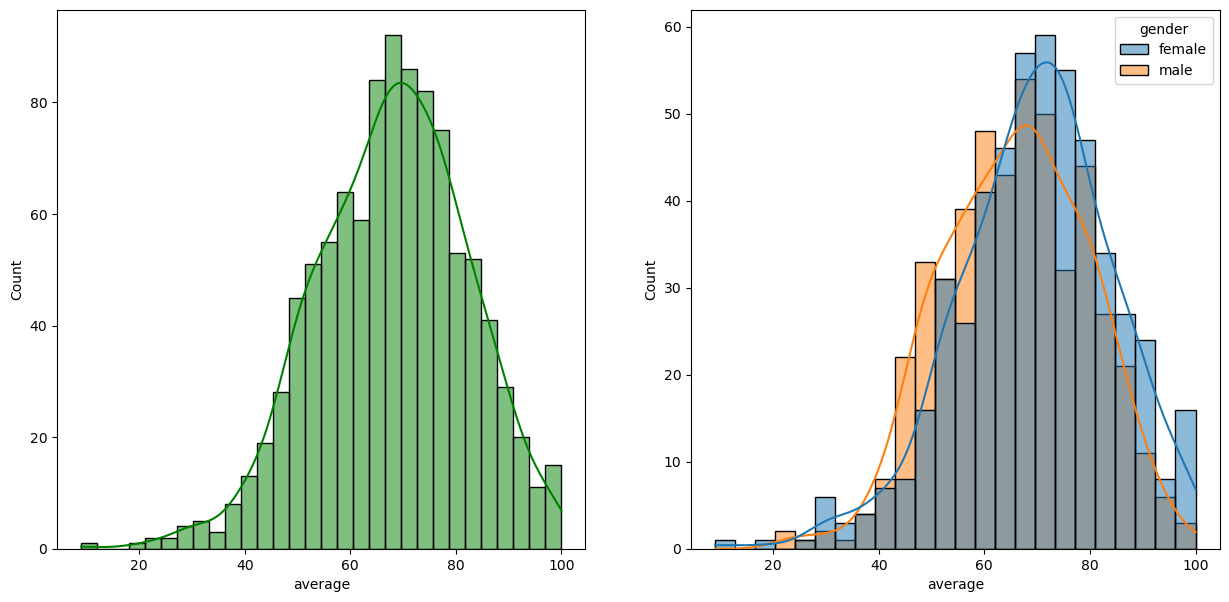

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) #121 means 1 row,2col and 1st subplot
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)  #122 means 1 row,2col and 2 subplot
sns.histplot(data=df,x='average',kde=True , hue='gender')
plt.show()

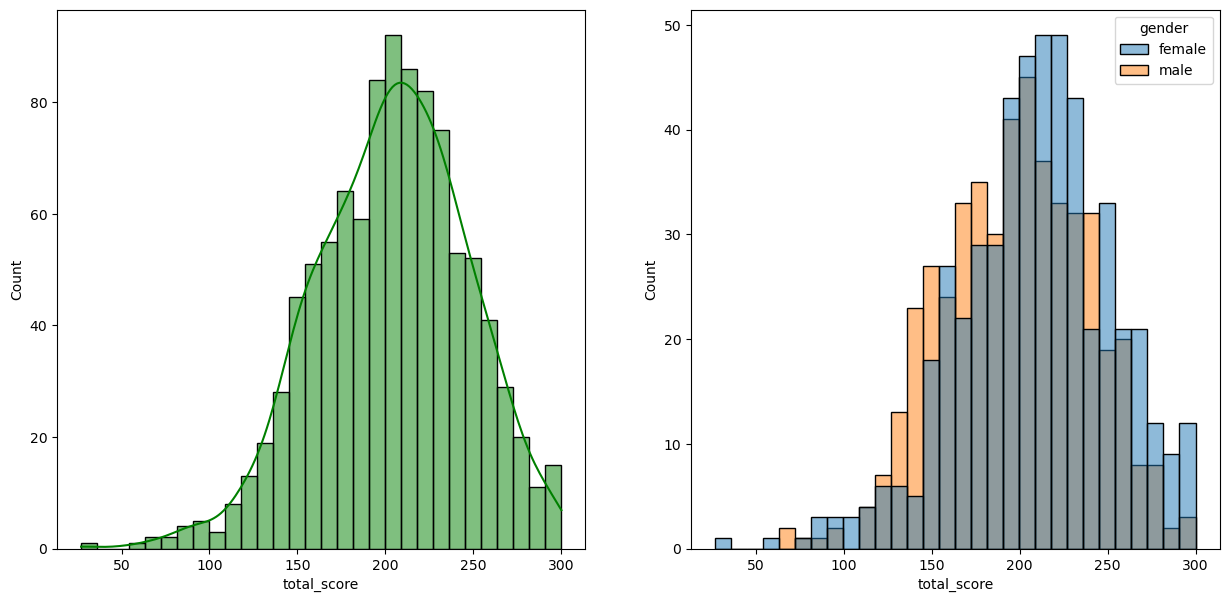

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30 , hue='gender')
plt.show()

 - INSIGHTS
* Female students to perform well then male students

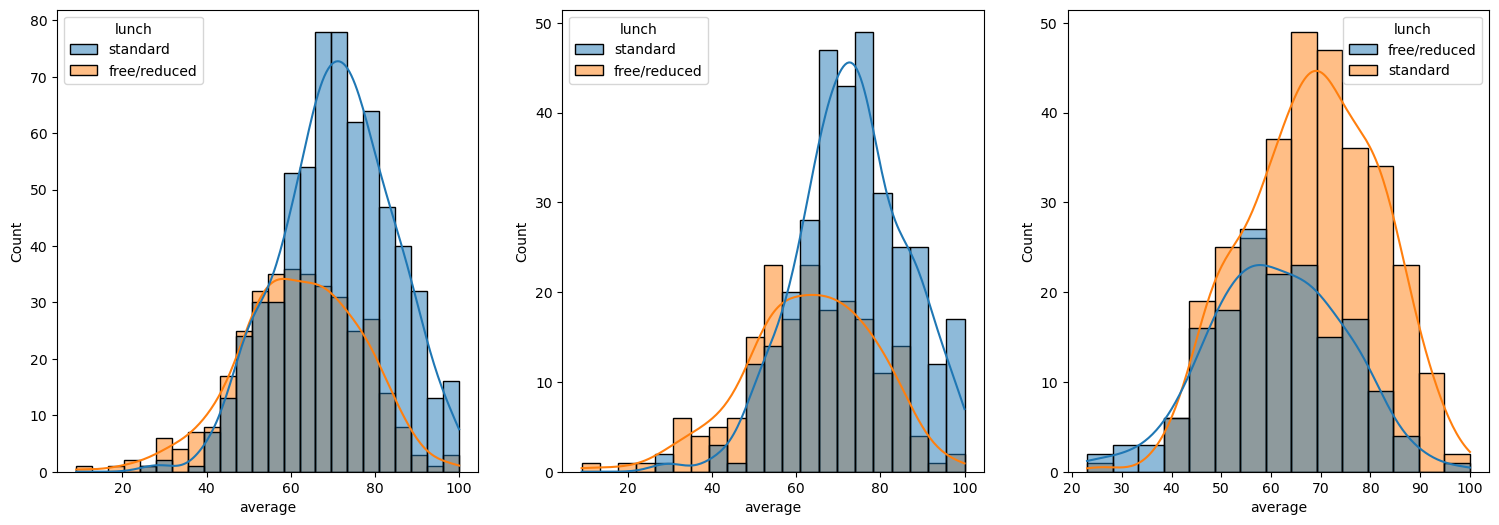

In [19]:
#Plotting  lunch for females and males w.r.t lunch 

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)  #1 row 3 col and 1subplot
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### INSIGHTS
- Standard lunch helps to perform better in test for female as well male


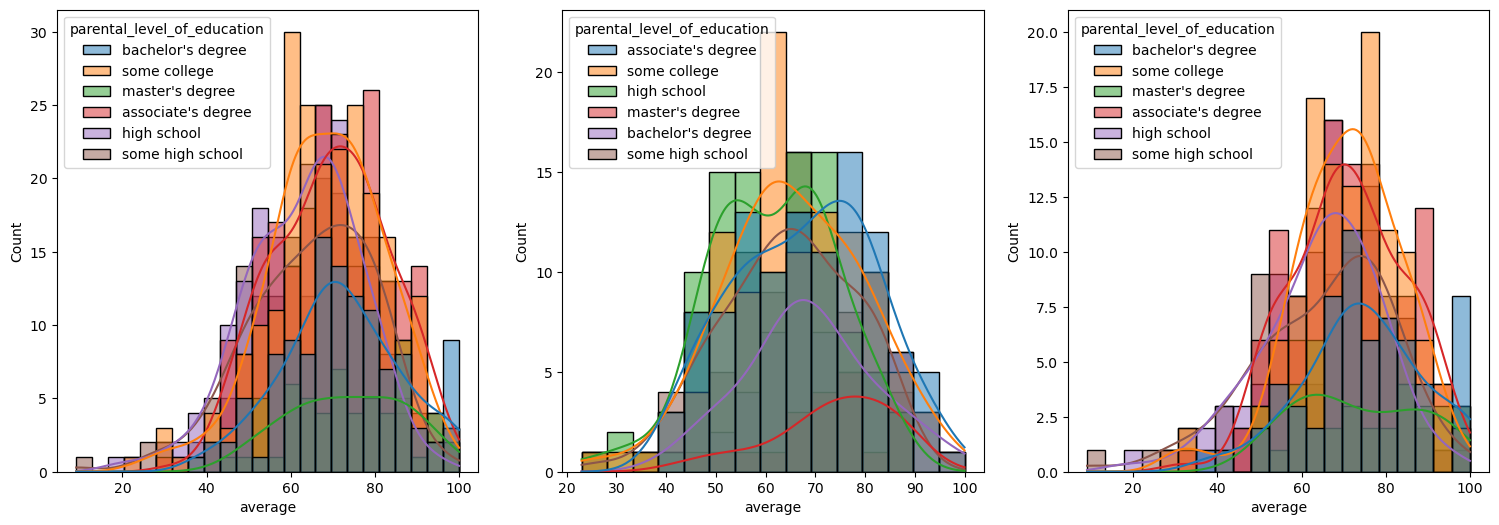

In [20]:
#PLotting average  w.r.t PARETAL_EDUCATION 
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

##### -  In general parents education do not help in xams

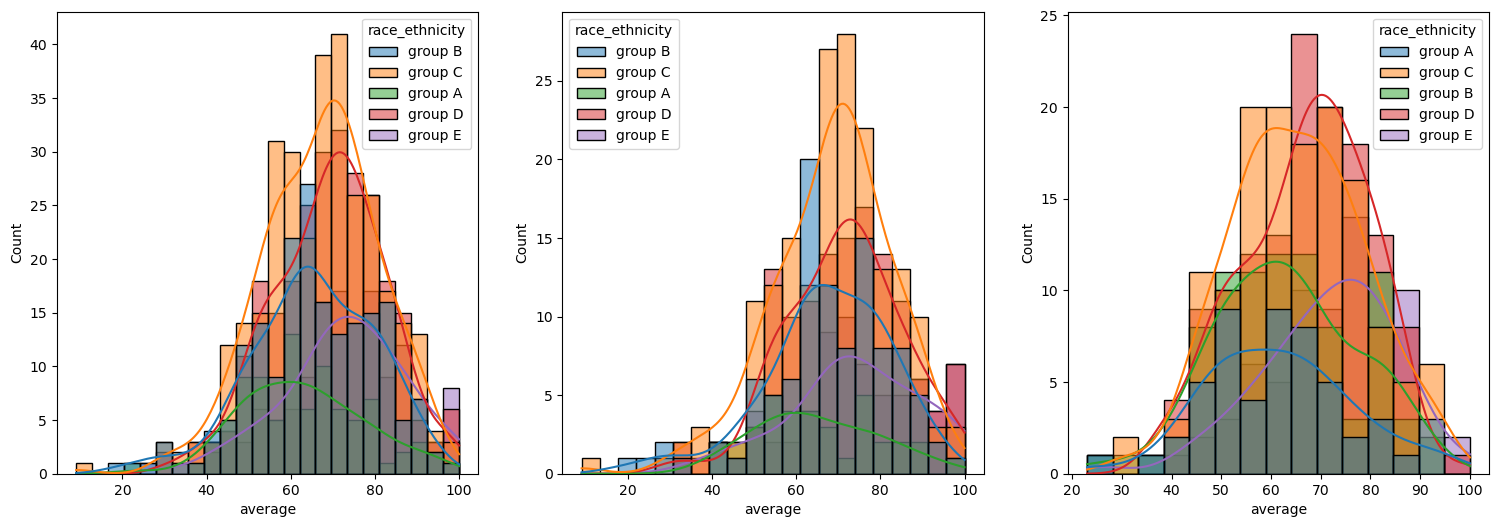

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

##### - Students of grp A and grp B do not perform tend t perform poor

##### Maximum score of students in all three subjects

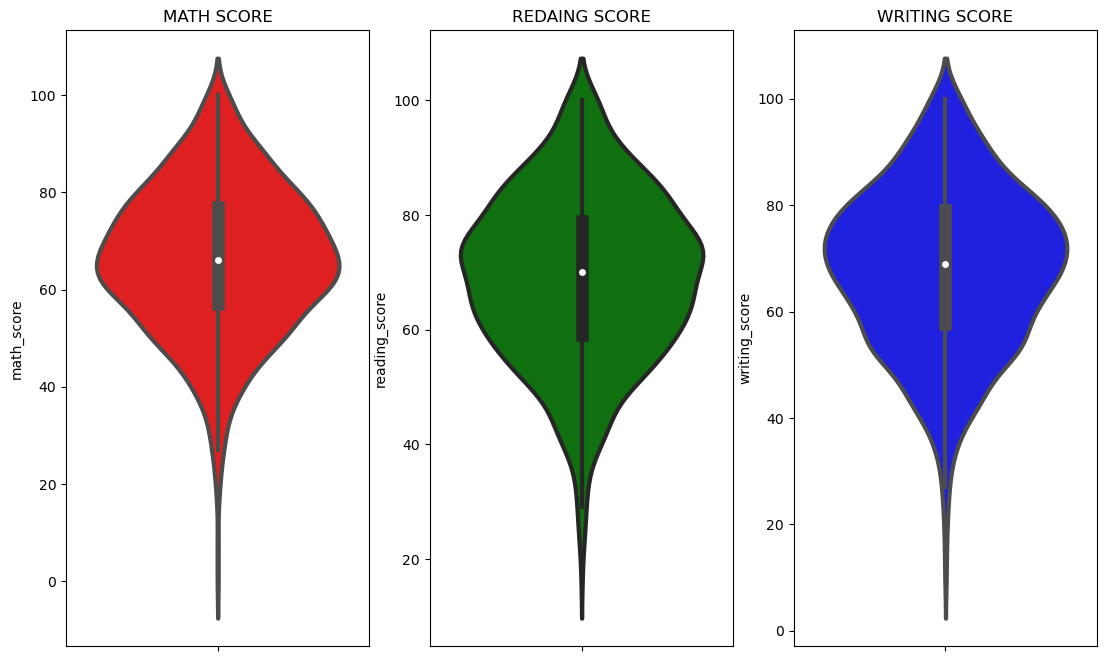

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title("REDAING SCORE")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(143)
plt.title("WRITING SCORE")
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


- most of the students score between 50-80 in maths reading and writing

#### MULTIVARIATE ANALYSIS USING PIEPLOT

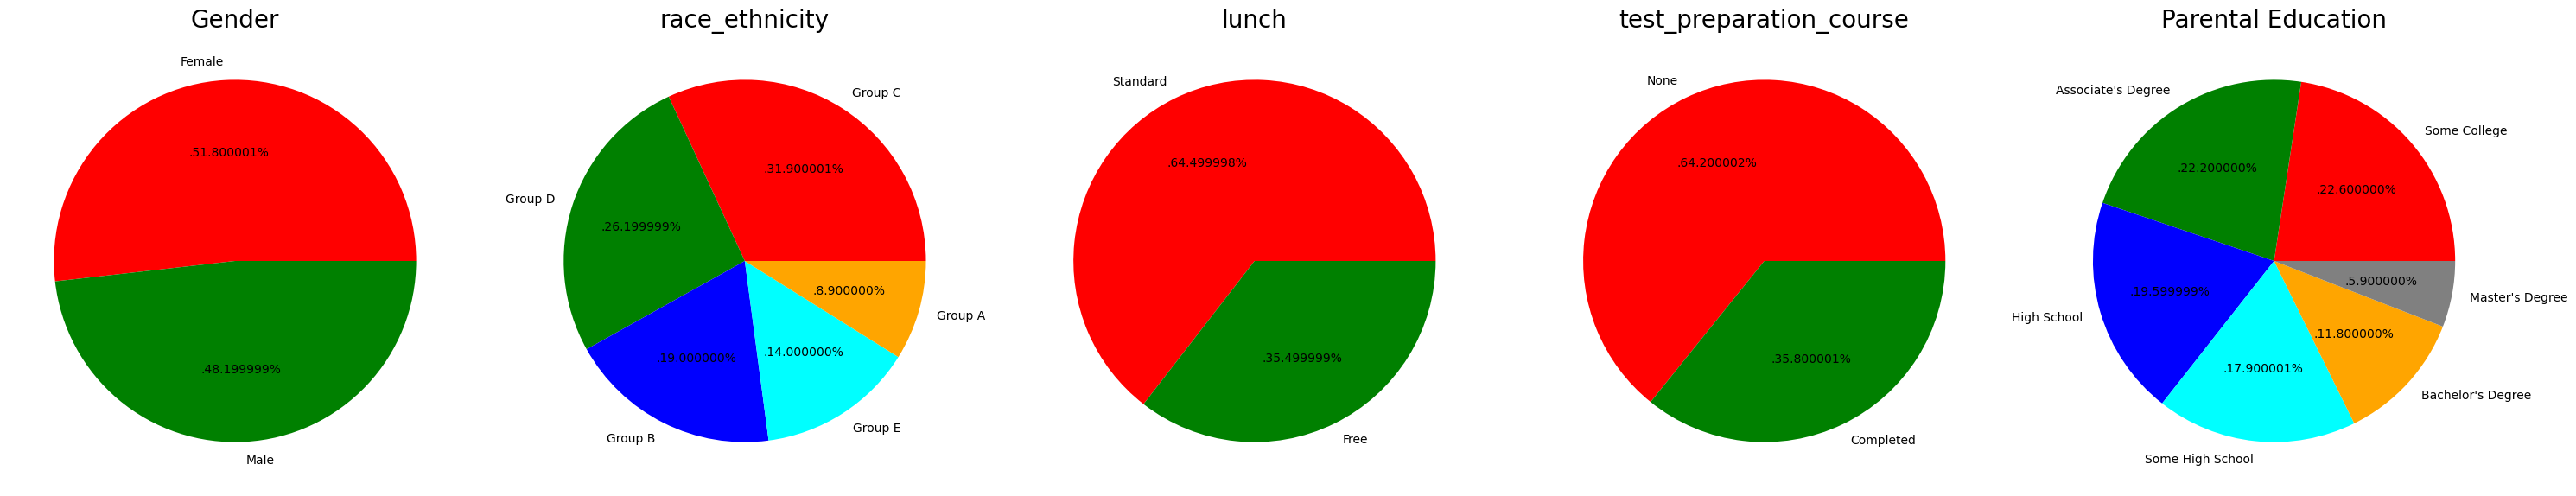

In [23]:
# Set the default figure size to 30 inches wide and 12 inches tall
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot in a grid with 1 row and 5 columns, and use the 1st position
plt.subplot(1,5,1)
size =df['gender'].value_counts()  # Get the counts of each unique value in the 'gender' column
labels='Female','Male'       # Define labels for the pie chart
color=['red','green']  # Define colors for the pie chart

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
color=['red', 'green', 'blue', 'cyan','orange']


plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels= 'Standard', 'Free'
color=['red', 'green']


plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels= 'None', 'Completed'
color=['red', 'green']


plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


- number of male and female students is almost equal
- No of students are greatest in  GroupC 
- No of students who have standard lunch are greater
- NO of students who do not enrolled in Test Prep course are greater

## 4) FEATURE-WISE VISUALIZATION

##### 4.1  Gender Column

- How is the ditribution of gender
- Is gender having any impact on the students's performance

##### UNIVARIATE ANALYSIS

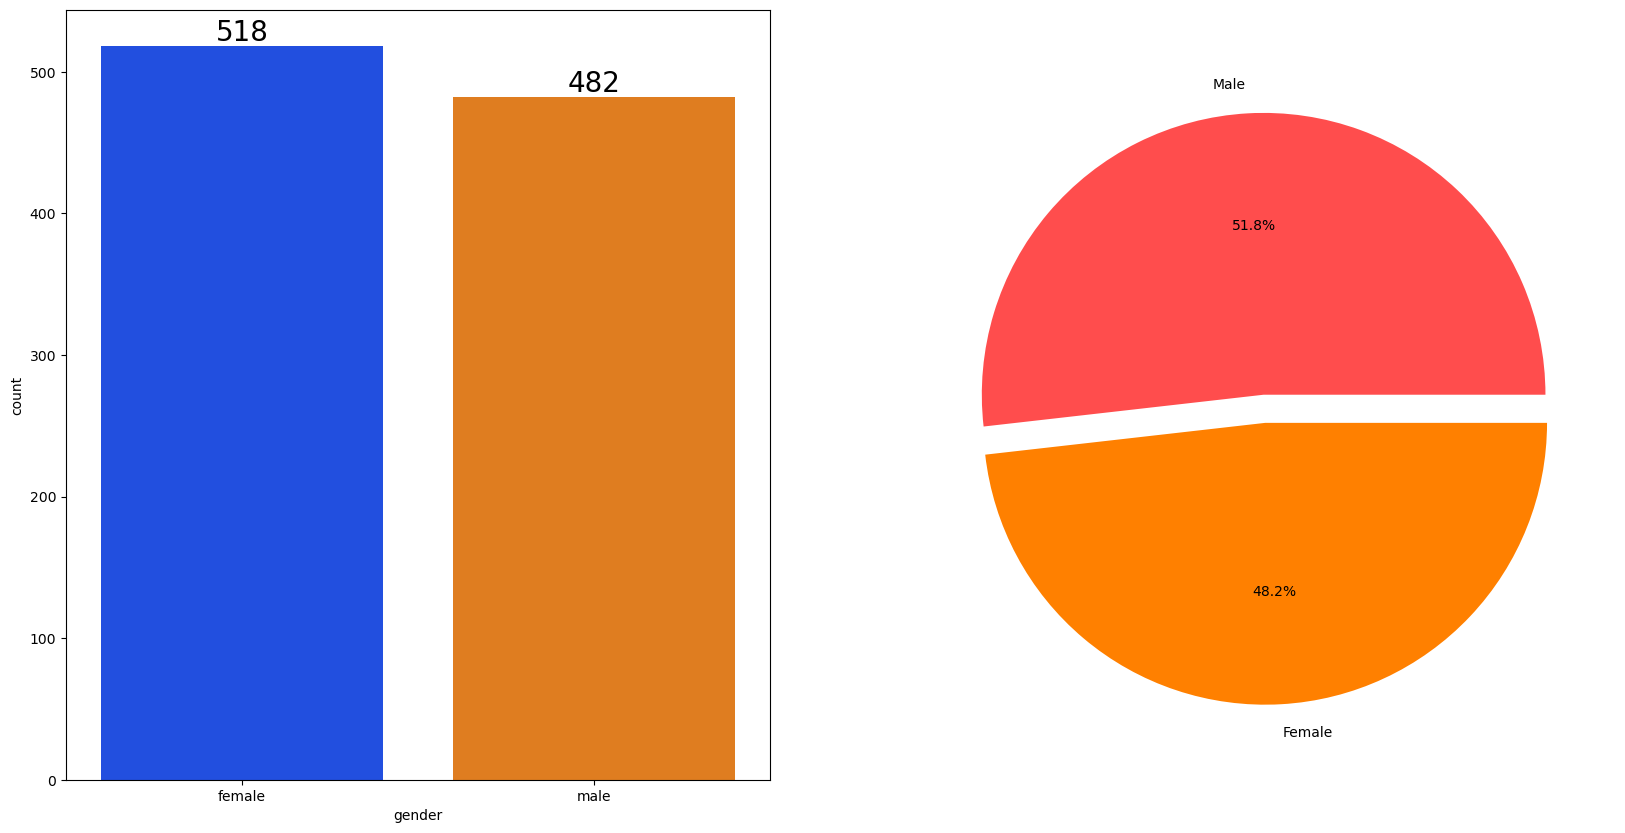

In [24]:
# Create a figure with 1 row and 2 columns of subplots, and set the figure size to 20 inches by 10 inches
f,ax=plt.subplots(1,2,figsize=(20,10))

# Create a count plot for the 'gender' column using a bright color palette
# Place this plot in the first subplot (ax[0])
sns.countplot( x= df['gender'], data=df , ax=ax[0], palette='bright')

# Add labels to the bars in the count plot
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# Create a pie chart for the 'gender' column
# Explode the second slice (for 'Female') slightly, add percentage labels, add a shadow, and specify custom colors
plt.pie(x=df['gender'].value_counts(), labels =['Male','Female'],explode=[0,0.1], autopct='%1.1f%%',colors=['#ff4d4d', '#ff8000'])
plt.show()

- Gender has a balanced data with male(51.8%) and female(48.2)

#### BIVARIATE ANALYSIS  (Is gender has any impact on students performance)

In [25]:
gender_grp= df.groupby('gender').mean()
gender_grp

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


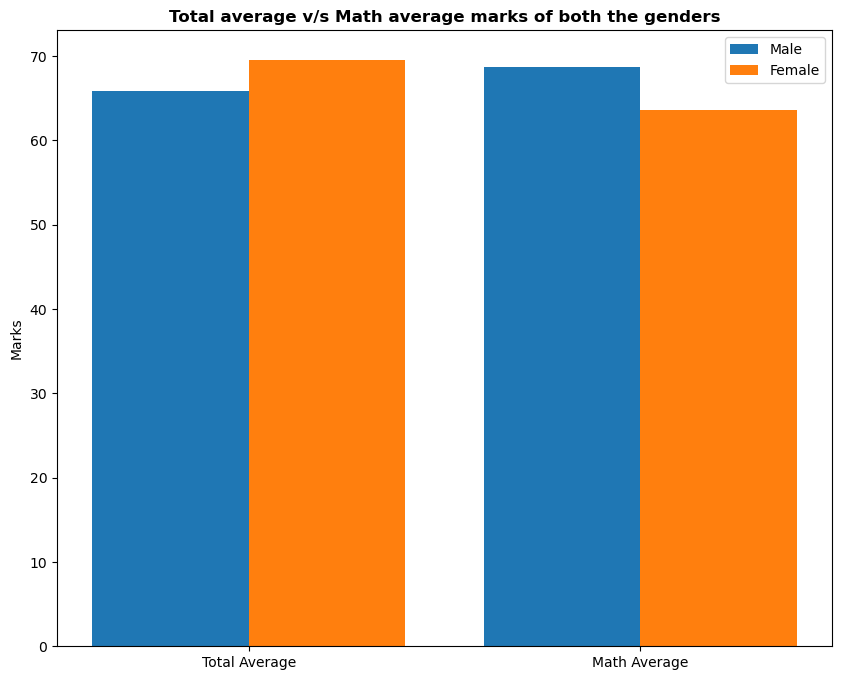

In [26]:
# Set the figure size to 10 inches by 8 inches
plt.figure(figsize=(10,8))

# Define the categories for the x-axis
X = ['Total Average','Math Average']

# Extract the female scores for 'average' and 'math score' from the gender_group DataFrame
female_scores=[gender_grp['average'][0],gender_grp['math_score'][0]]

# Extract the male scores for 'average' and 'math score' from the gender_group DataFrame
male_scores=[gender_grp['average'][1],gender_grp['math_score'][1]]

# Define the positions of the bars on the x-axis
X_axis = np.arange(len(X))

# Plot the bars for male scores, slightly shifted to the left (-0.2) with a width of 0.4
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')

# Plot the bars for female scores, slightly shifted to the right (+0.2) with a width of 0.4
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Set the labels for the x-axis ticks to the categories defined in X
plt.xticks(X_axis, X)

plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On average ,female score  better than male students
- In maths, males scored more than female students

### 4.2 RACE/EHNICITY COLUMN 

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS 

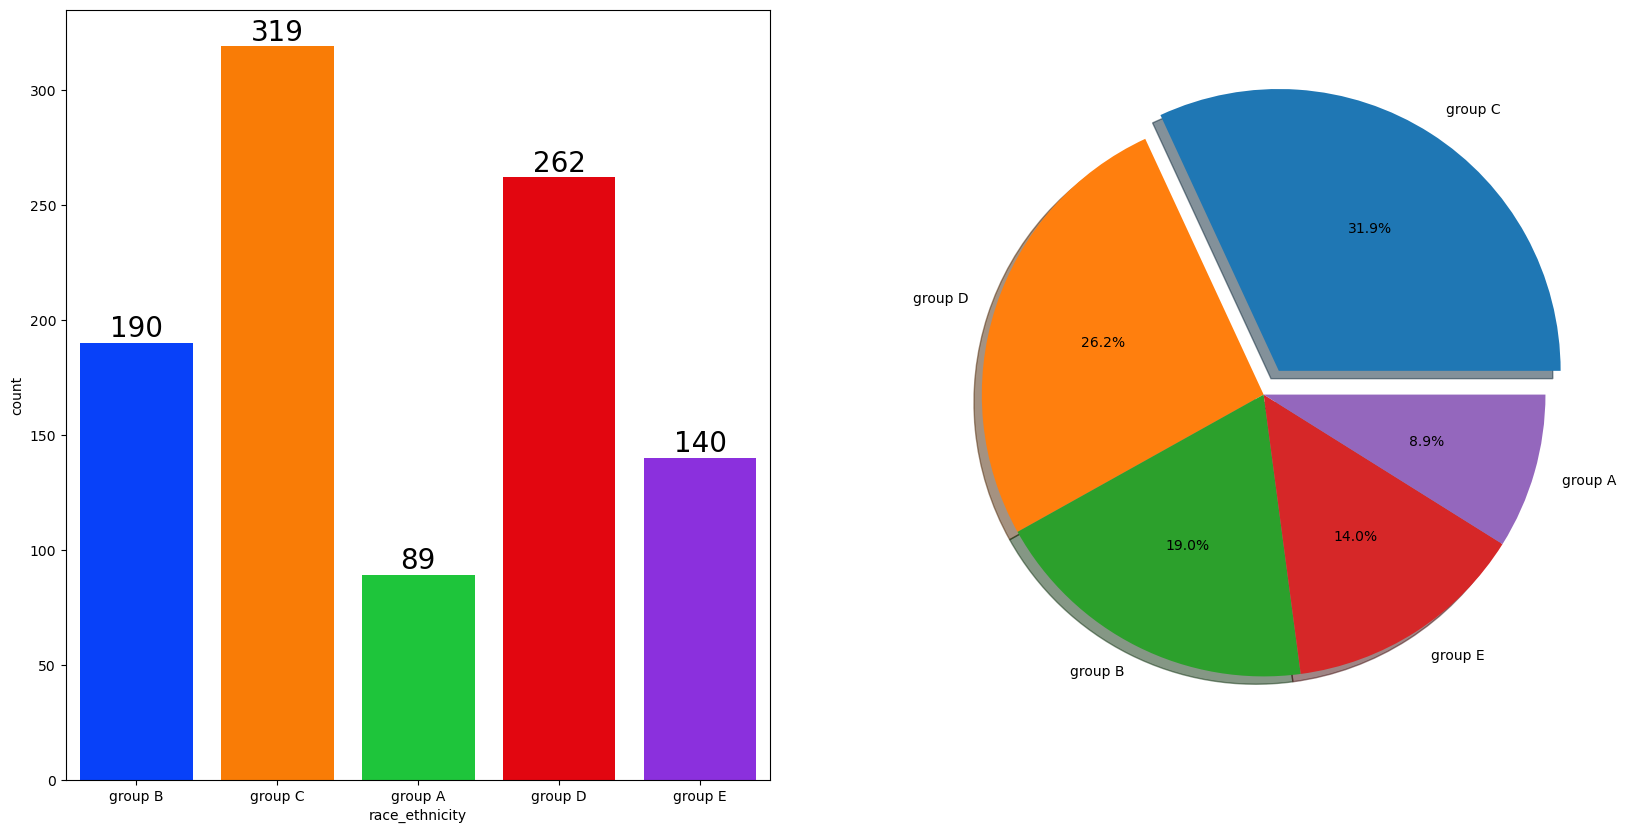

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

##### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? ) 

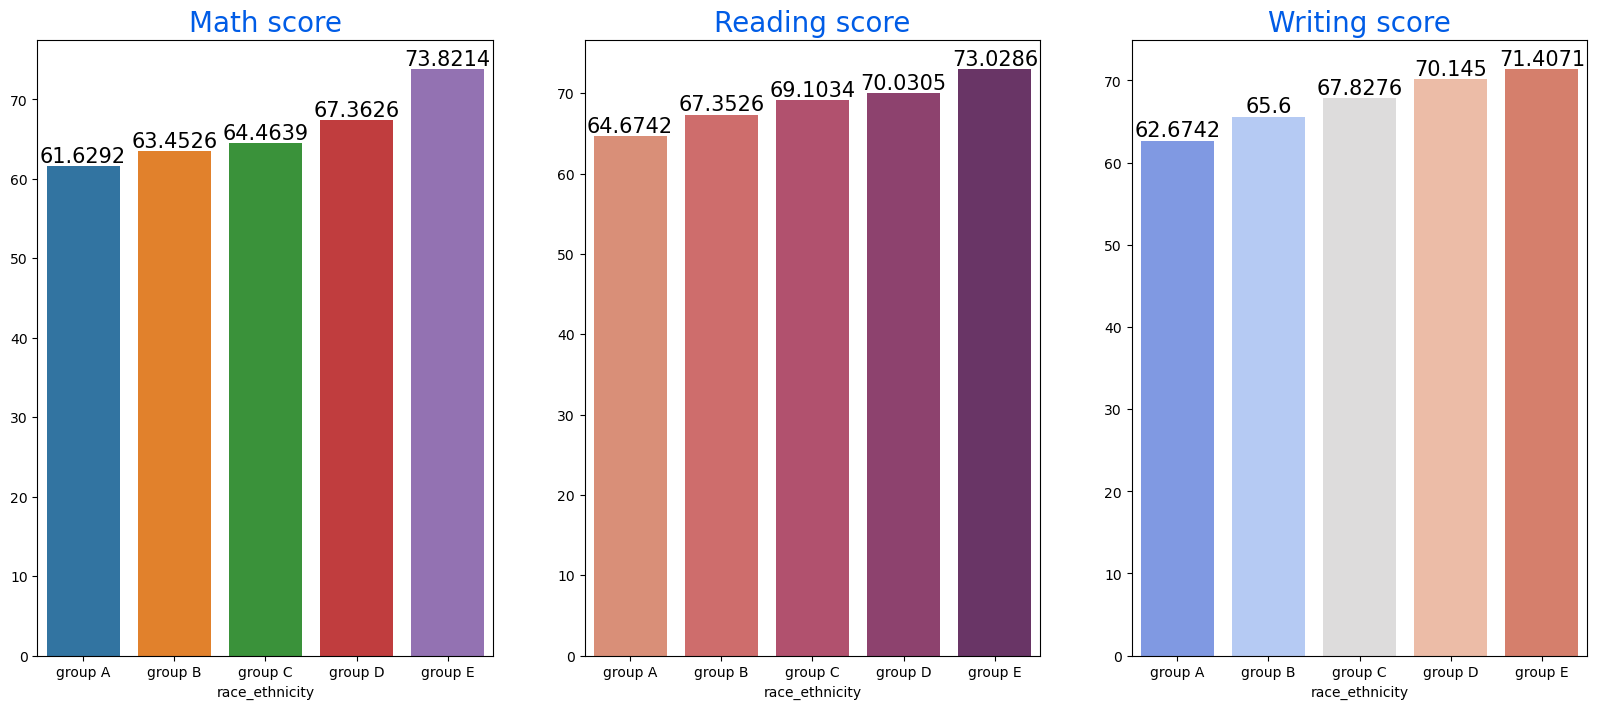

In [28]:
grp_data=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=grp_data['math_score'].mean().index, y=grp_data['math_score'].mean().values,ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=grp_data['reading_score'].mean().index,y=grp_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data['writing_score'].mean().index,y=grp_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)    


- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

#### 4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent

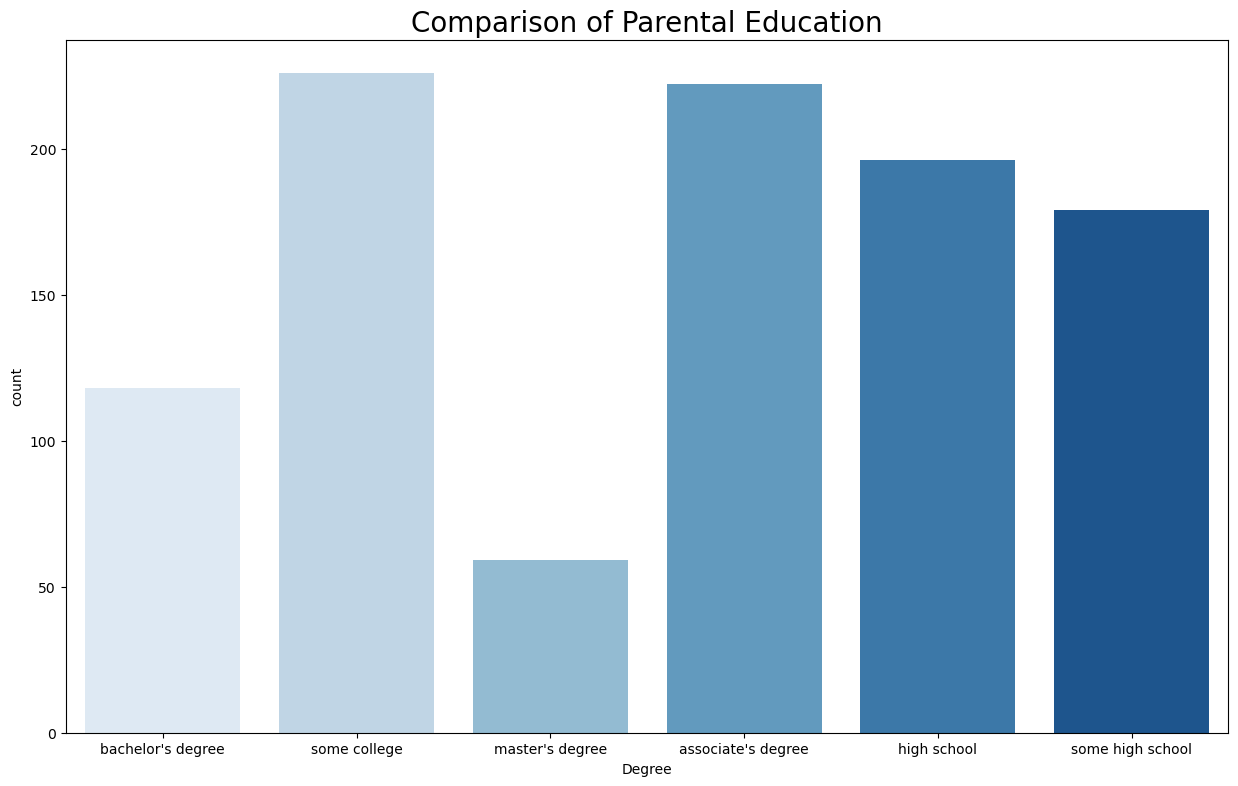

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college.

##### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? 

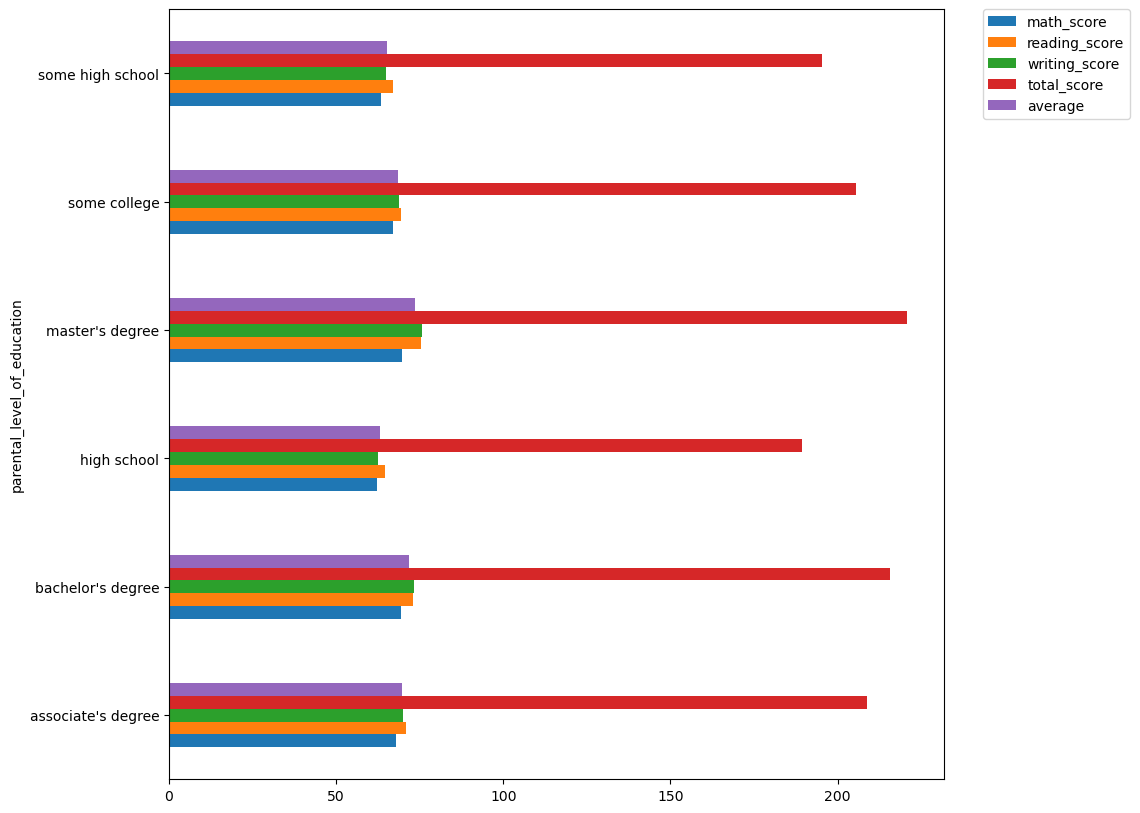

In [30]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

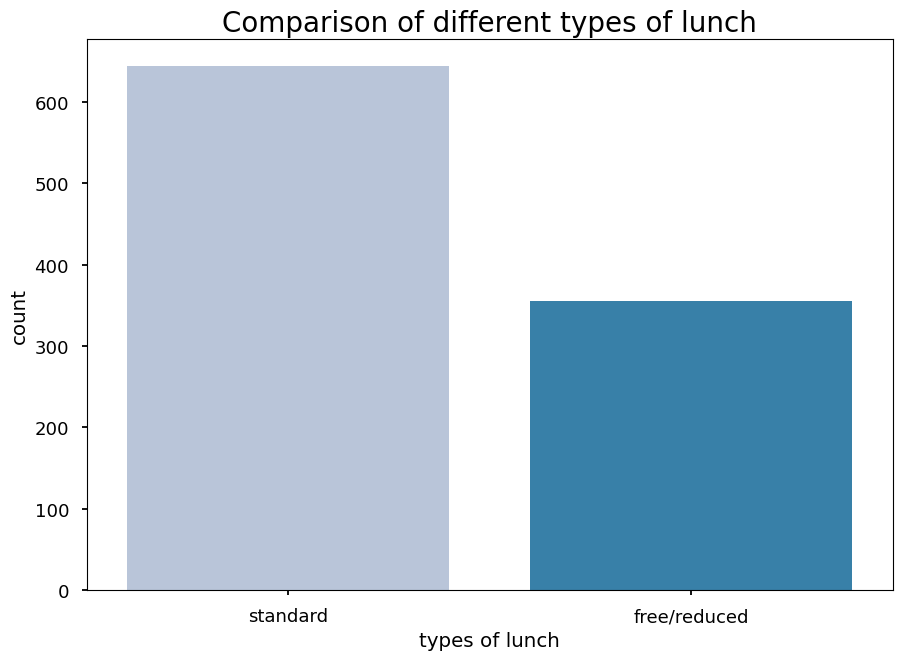

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

- Students being served Standard lunch was more than free lunch

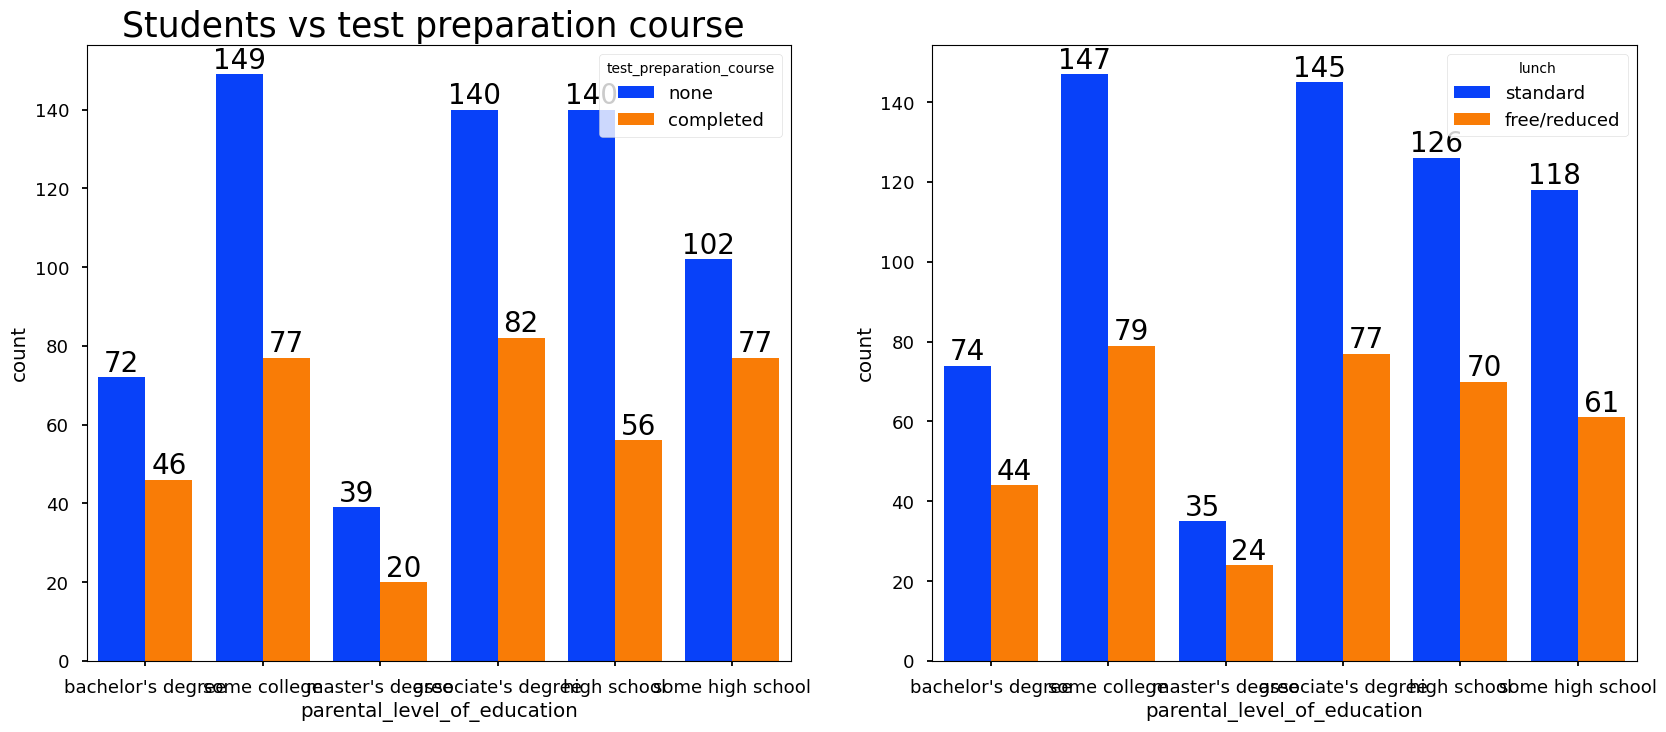

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## 4.5 TEST PREPARATION COURSE COLUMN

##### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

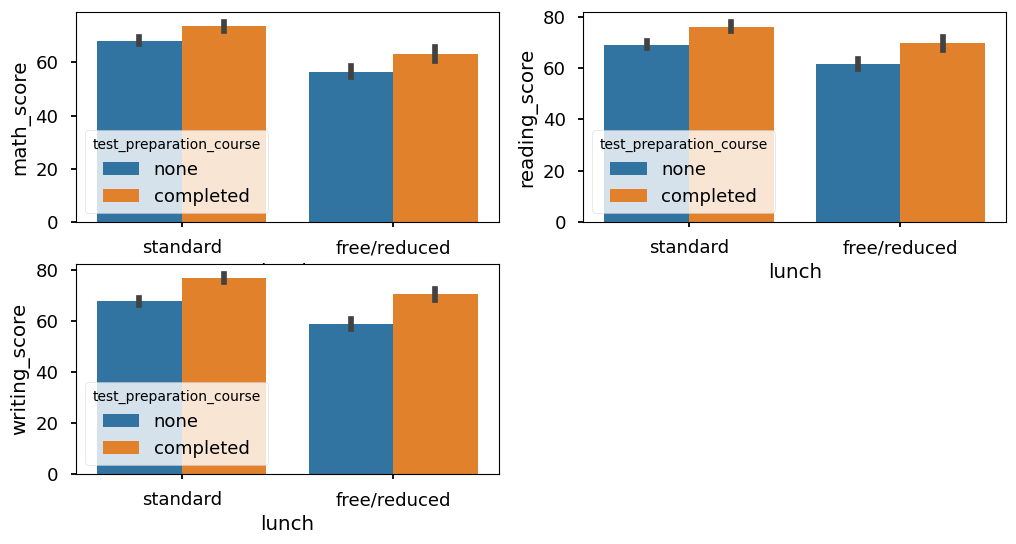

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

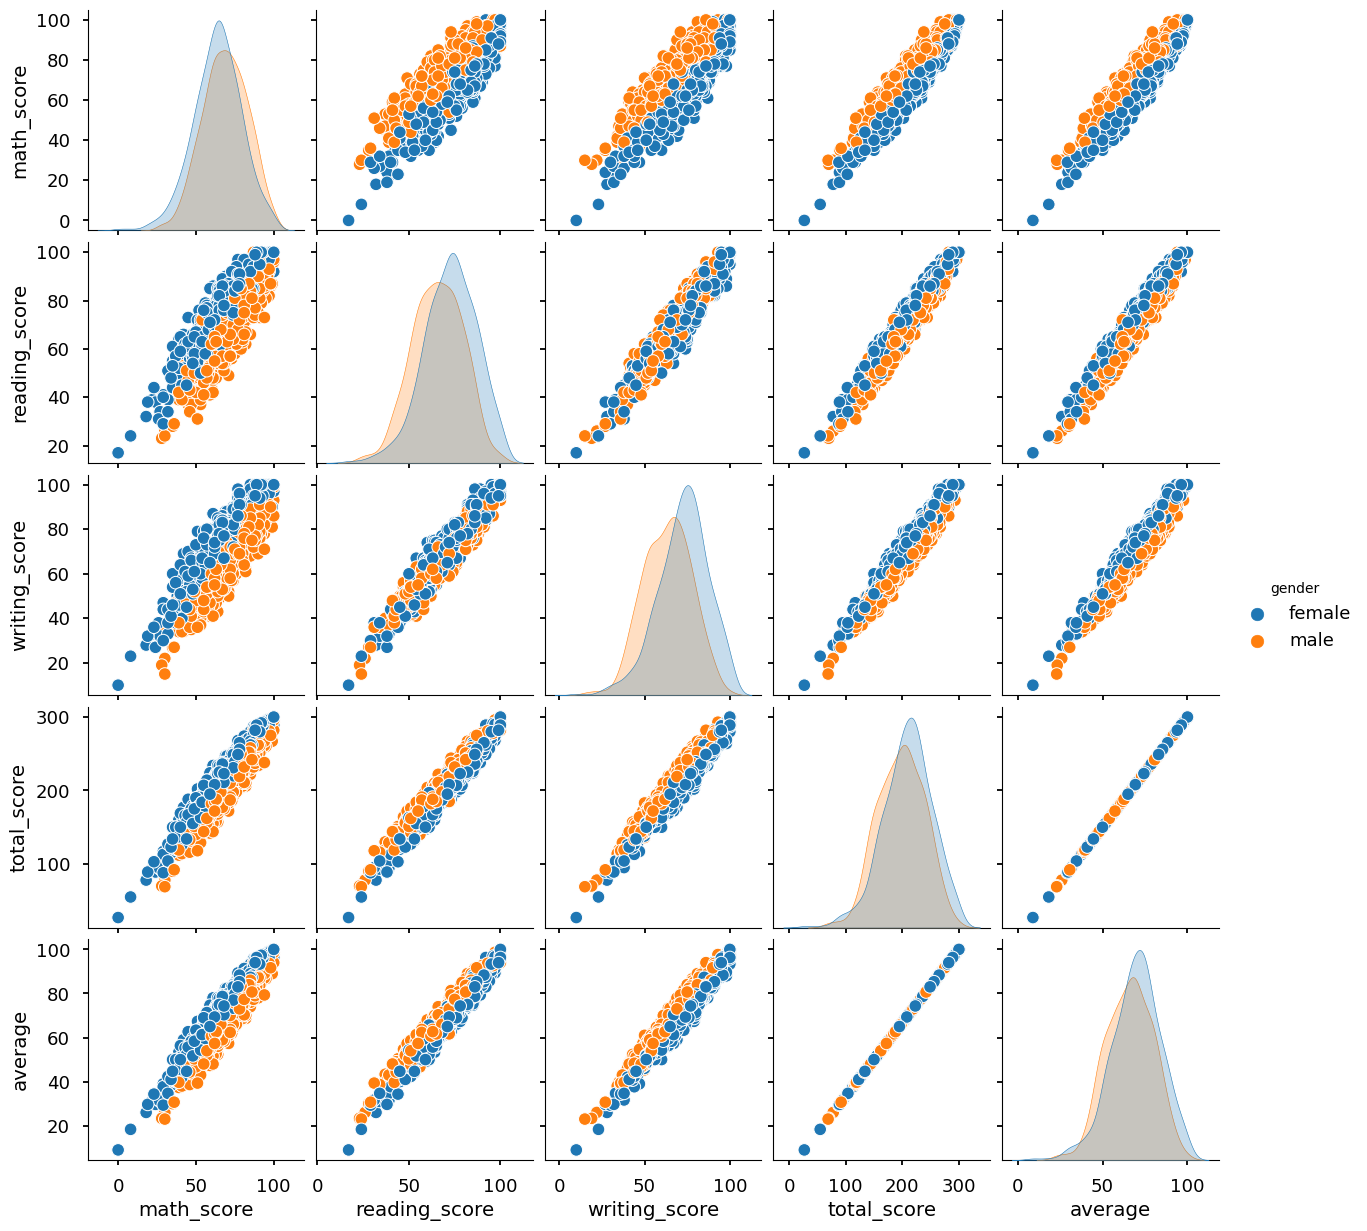

In [40]:
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other.

- Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.